----------------------------------------------------------------------------------
WORD ENCODING--- Going thru WORD ENCODING TECHNIQUES
1. One - hot Encoding 
2. BOW
3.TF-IDF



In [ ]:
## 1. Basic One-Hot Encoding for a Small Corpus
## Question: Create a one-hot encoding for a vocabulary derived from the following sentences:

##  ["I love programming in python"]

In [3]:
sentance = ["I love programming in python"]
print(type(sentance))

<class 'list'>


In [9]:
tokens = []

for i in sentance:
    tokens.append(i.split())
print(type(tokens))
print('Sentance splitted into words:',tokens)
vocabulary = sorted(list(set(tokens[0])))
print('Unique words in the sentance:',vocabulary)



<class 'list'>
Sentance splitted into words: [['I', 'love', 'programming', 'in', 'python']]
Unique words in the sentance: ['I', 'in', 'love', 'programming', 'python']


In [10]:
## importing Required Librabries and Dependendies
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder


In [13]:
OneHotEncoder_1=OneHotEncoder()

encoder=OneHotEncoder_1.fit([[word] for word in vocabulary])

In [25]:
encoded_words=[]
for i in vocabulary:
    encoded_word=encoder.transform([[i]]).toarray()
    encoded_words.append(encoded_word)
                      

In [21]:
sentance = ["I love programming in python"]
print(type(sentance))  # Output: <class 'list'>

# Tokenize the sentence
tokens = []
for i in sentance:
    tokens.extend(i.split())  # Flatten the words directly into `tokens`

print(type(tokens))  # Output: <class 'list'>
print('Sentence split into words:', tokens)

# Create vocabulary
vocabulary = sorted(list(set(tokens)))  # Unique words
print('Unique words in the sentence:', vocabulary)

# Import required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[word] for word in vocabulary])  # Fit with the vocabulary

# Transform the sentence
encoded_words = []
for word in tokens:
    encoded_word = encoder.transform([[word]]).toarray()
    print('Encoded Word:', encoded_word)
    encoded_words.append(encoded_word)

print("Encoded words:")
for word, encoded in zip(tokens, encoded_words):
    print(f"{word}: {encoded}")


<class 'list'>
<class 'list'>
Sentence split into words: ['I', 'love', 'programming', 'in', 'python']
Unique words in the sentence: ['I', 'in', 'love', 'programming', 'python']
Encoded Word: [[1. 0. 0. 0. 0.]]
Encoded Word: [[0. 0. 1. 0. 0.]]
Encoded Word: [[0. 0. 0. 1. 0.]]
Encoded Word: [[0. 1. 0. 0. 0.]]
Encoded Word: [[0. 0. 0. 0. 1.]]
Encoded words:
I: [[1. 0. 0. 0. 0.]]
love: [[0. 0. 1. 0. 0.]]
programming: [[0. 0. 0. 1. 0.]]
in: [[0. 1. 0. 0. 0.]]
python: [[0. 0. 0. 0. 1.]]


In [26]:
## One-Hot Encoding Using Scikit-learn
## Task: Encode the words: ["apple", "banana", "cherry", "banana"] into one-hot vectors.

In [34]:
words = ["apple", "banana", "cherry", "banana"]
words = sorted(list(set(words)))

Onehotencoder = OneHotEncoder()

OneHotEncoder_fit = Onehotencoder.fit([[word] for word in words])

encoded_vectors=[]
for word in words:
    encoded_vector=OneHotEncoder_fit.transform([[word]]).toarray()
    encoded_vectors.append(encoded_vector)

for word, vector in zip(sorted(list(set(words))), encoded_vectors):
    print(f"Word: {word} -> One-Hot Encoding: {vector}")


Word: apple -> One-Hot Encoding: [[1. 0. 0.]]
Word: banana -> One-Hot Encoding: [[0. 1. 0.]]
Word: cherry -> One-Hot Encoding: [[0. 0. 1.]]


In [52]:
corpus = [
    "The cat sat on the mat",
    "The dog barked at the mailman",
    "The bird sang in the morning"
]

In [53]:
tokens = [sentence.split() for sentence in corpus]

tokens

[['The', 'cat', 'sat', 'on', 'the', 'mat'],
 ['The', 'dog', 'barked', 'at', 'the', 'mailman'],
 ['The', 'bird', 'sang', 'in', 'the', 'morning']]

In [56]:
unique_words = sorted(list(set(word for sentence in tokens for word in sentence)))
unique_words

['The',
 'at',
 'barked',
 'bird',
 'cat',
 'dog',
 'in',
 'mailman',
 'mat',
 'morning',
 'on',
 'sang',
 'sat',
 'the']

In [58]:
Onehotencoder = OneHotEncoder(sparse_output=False)

Onehotencoder.fit([[word] for word in unique_words])

encoded_sentences = []
for sentence in tokens:
    # Transform each word in the sentence into one-hot encoding
    encoded_sentence = Onehotencoder.transform([[word] for word in sentence])
    encoded_sentences.append(encoded_sentence)


for i, sentence in enumerate(corpus):
    print(f"Sentence: '{sentence}'")
    for word, encoded in zip(tokens[i], encoded_sentences[i]):
        print(f"{word}: {encoded}")
    print()

Sentence: 'The cat sat on the mat'
The: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cat: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sat: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
on: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
mat: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

Sentence: 'The dog barked at the mailman'
The: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dog: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
barked: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
at: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
mailman: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]

Sentence: 'The bird sang in the morning'
The: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
bird: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sang: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
in: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
the: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
morning: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0

In [ ]:
Text = "I love programming. Programming is fun and challenging."
Text = Text.lower()

from sklearn.feature_extraction.text import CountVectorizer

Text = Text.split()

unique_text = sorted(list(set(Text)))

unique_text

vectorizer = CountVectorizer()


vectorizer.fit_transform([Text]).toarray()

vectorizer.get_feature_names_out()



In [77]:
Text = Text.split()

In [78]:
Text

['i',
 'love',
 'programming.',
 'programming',
 'is',
 'fun',
 'and',
 'challenging.']

In [79]:
unique_text = sorted(list(set(Text)))

In [80]:
unique_text

['and',
 'challenging.',
 'fun',
 'i',
 'is',
 'love',
 'programming',
 'programming.']

In [81]:
vectorizer = CountVectorizer()

In [88]:
vectorizer.fit_transform([Text]).toarray()

array([[1, 1, 1, 1, 1, 2]])

In [84]:
vectorizer.get_feature_names_out()

array(['and', 'challenging', 'fun', 'is', 'love', 'programming'],
      dtype=object)

In [89]:
vectorizer.vocabulary_

{'love': 4, 'programming': 5, 'is': 3, 'fun': 2, 'and': 0, 'challenging': 1}

In [107]:
texts = [
    "The cat sat on the mat",
    "The dog barked at the cat",
    "The bird sang a song"
]

In [108]:
dtm = vectorizer.fit_transform(texts).toarray()

In [109]:
vectorizer.vocabulary_

{'the': 10,
 'cat': 3,
 'sat': 8,
 'on': 6,
 'mat': 5,
 'dog': 4,
 'barked': 1,
 'at': 0,
 'bird': 2,
 'sang': 7,
 'song': 9}

In [110]:
pip install matplotlit.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlit.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlit.pyplot
Note: you may need to restart the kernel to use updated packages.


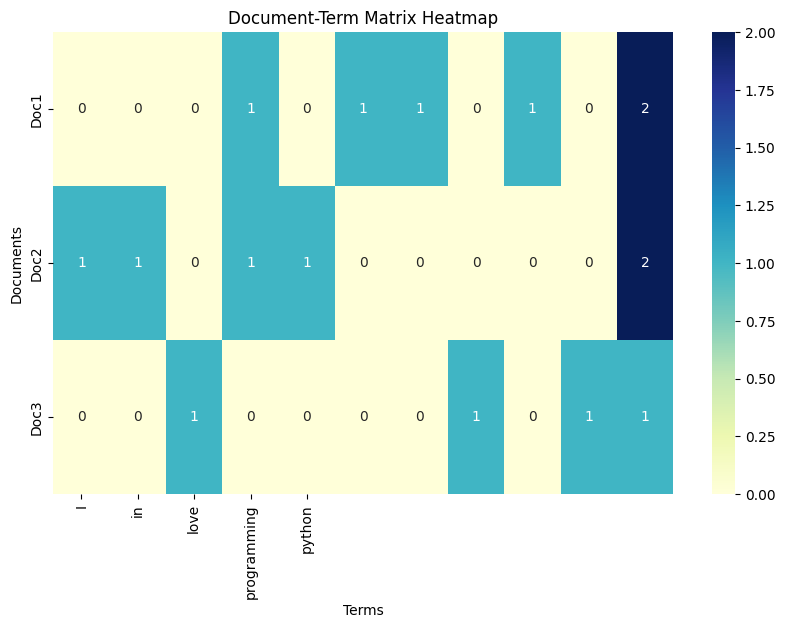

In [111]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(dtm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=vocabulary, yticklabels=[f"Doc{i+1}" for i in range(len(texts))])
plt.title("Document-Term Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Dataset
dataset = [
    ("I love this movie", "positive"),
    ("This movie was terrible", "negative"),
    ("An excellent film with great acting", "positive"),
    ("The plot was boring", "negative"),
]

# Step 1: Split the dataset into features and labels
texts = [text for text, sentiment in dataset]
labels = [sentiment for text, sentiment in dataset]

texts

['I love this movie',
 'This movie was terrible',
 'An excellent film with great acting',
 'The plot was boring']